In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from collections import Counter
import collections
import string
from datetime import datetime as dt
from datetime import timedelta

In [2]:
kigo = string.punctuation
number = string.digits
moji = string.ascii_lowercase

In [3]:
strdt = dt.strptime("20180101", '%Y%m%d')  # 開始日
enddt = dt.strptime("20191231", '%Y%m%d')  # 終了日

days_num = (enddt - strdt).days + 1

In [4]:
datelist = []
for i in range(days_num):
    datelist.append(strdt + timedelta(days=i))

In [138]:
texts = pd.read_csv('BERT2018-2019.csv')

In [139]:
texts.set_index('date')
dateTimeIndex = pd.DatetimeIndex(texts['date'])
texts.index = dateTimeIndex
texts = texts.drop("date", axis=1)

In [7]:
artical = pd.DataFrame(index=[],columns=['result'])
date = dateTimeIndex.drop_duplicates()
for i in range(0,len(texts)):
    dates = str(date[i].strftime("%Y-%m-%d"))
    for j in range(1,6):
        if i == i:
            kari = texts[dates:dates][str(j)]
        else:
            kari = artical.append(texts[dates:dates][str(j)])
    table = str.maketrans( '', '',kigo)
    StrA = ''.join(str(kari.values.tolist()))
    result = StrA.translate(table)
    table = str.maketrans( '', '',number)
    result = result.translate(table)
    table = str.maketrans( '', '',moji)
    result = result.translate(table)
    table = str.maketrans( '', '','・、')
    result = result.translate(table)
    print(str(i)+"/回"+result)
    tmp_se = pd.Series( result, index=artical.columns )
    artical = artical.append( tmp_se, ignore_index=True )

0/回ル  の 分 暴力 を ハンドボール  旅行  目 県内  公園   司 トル より  注目  は お お れる グ の  について    と 道 頭 
1/回  大使 円   週間 県営 王者 日本人 フラン  セント に 共産党 オークランド 前 フラン 国立  郎      円 試合  り  機構 育 許 許 フラン 力士
2/回 円  後 について に対して  決勝 フラン 後  と 調整 デイリー  部 てる 会計  平 平 の 三塁手 所 フラン     外相 ポンド 外相 資産 から  通信 柳 路 市場 セント 通信 指揮 監禁 セント 太 も セント 柳 対 対 セント モスクワ リーグ 大使 。 秋 シドニー ニュース ウォン ハン による シングルス 日間 年 圏 フェ 女子 監督 ドル シングルス 連 取引 プロ の ごと   で  と と セントラル   高 な  店頭 から  から   な  清  全米   外貨
3/回  支払 優勝 と 取引  規模  おろ 女子 政府 平均 期 現職 の 島    社 社   セント   で 動き  朝 マクドナルド  日 で ある 都内 週 アジア  府 変 週 セント 同 需 販売 と と で の 母  ド   前 市場  は  ポンド 水   適 退   や        分 を   フラン 参加 「 減  日   分 の 社 た フォーラム の フォーラム せ  ン 終了 マクドナルド  なく  ン 年間 セント 債券 米国 モン  が 米国    落  に関し   ヒン コア  ヒン に コア 新聞 において  リーグ 新聞 ン 株価  この 取引 危険  る
4/回 。 為替 通貨   公園 販売 分間 大臣 大臣 経済 経済 系 から 期 ※ 債券  日経 日 に に に オリンピック  贈呈 調査 ユーロ ユーロ 歳入 政治  歳入 週 月末 ドル   学 セント を 釘 会場 学 半導体   日経 週 ポンド 値 漁 今 まで まで    薬  介    薬 フラン 政治 介 タイトルマッチ は 政治  政治 住宅  より         健康  で    シーズン 文字 都   縮 に 国営 による  建設 増 再 新 発行         取引 価格 国営   額 取引  

IndexError: index 409 is out of bounds for axis 0 with size 409

In [8]:
artical['date'] = date
artical.set_index('date')

,result
date,
2018-01-01,ル の 分 暴力 を ハンドボール 旅行 目 県内 公園 司 トル より 注目...
2018-01-02,大使 円 週間 県営 王者 日本人 フラン セント に 共産党 オークランド 前 ...
2018-01-03,円 後 について に対して 決勝 フラン 後 と 調整 デイリー 部 てる 会計 ...
2018-01-04,支払 優勝 と 取引 規模 おろ 女子 政府 平均 期 現職 の 島 社 社 ...
2018-01-05,。 為替 通貨 公園 販売 分間 大臣 大臣 経済 経済 系 から 期 ※ 債券 日...
...,...
2019-12-05,バンク 大蔵省 飾 開始 月末 党首 で シンガポール の で も へ...
2019-12-06,という 指定 連盟 に 月 から に アメリカ ック 特に 漁 時 推薦...
2019-12-07,団体 男子 冬季 ック 回戦 なる 大 は で 中村 男子 職員 ...


In [9]:
vec = artical['result']
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(vec)

In [10]:
Sum_of_squared_distances = []
K = range(2,8)

In [11]:
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

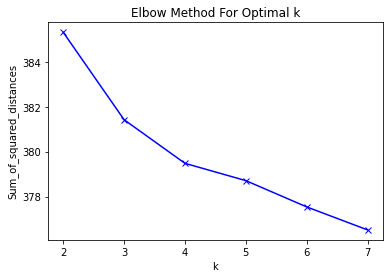

In [12]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [74]:
articles=["スポーツ","経済","国際","事件","災害","エンタメ","科学","その他"]
title=["スポーツ","経済","国際","事件","災害","エンタメ","科学","その他"]

In [80]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=7)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

  title  cluster
1    経済        1
2    国際        1
3    事件        1
4    災害        1
0  スポーツ        2
5  エンタメ        2
6    科学        2
7   その他        2


In [81]:
result={'cluster':labels,'news':vec}
result=pd.DataFrame(result)

Cluster: 0
Titles
Series([], )


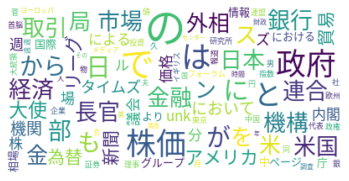

Cluster: 1
Titles
 経済
 国際
 事件
 災害


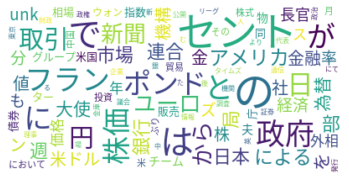

Cluster: 2
Titles
 スポーツ
 エンタメ
   科学
  その他


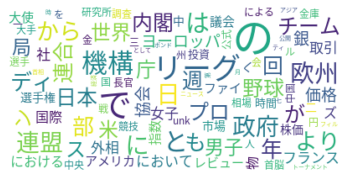

In [82]:
dictionary=[]
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['news'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    dictionary.append(text)
    wordcloud = WordCloud(font_path="NotoSansCJKjp-hinted/NotoSansCJKjp-Regular.otf",max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']         
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [83]:
key={}
for i in range(0,k+1):
    key[i] = Counter(dictionary[i].split()).keys()

In [149]:
texts['category'] = 0
for i in range(0,len(texts)):
    for j in range(0,5):
        for k in range(0,true_k):
            if texts.iat[i, j] in key[k]:
                texts.iloc[i, 5] = k

In [154]:
texts.to_csv("category2018-2019.csv")

In [155]:
Counter(texts['category'])

Counter({0: 38724, 2: 42640, 1: 4908})

In [27]:
artical = pd.DataFrame(index=[],columns=['result'])
date = dateTimeIndex.drop_duplicates()
num=[]
for i in range(0,2):
    dates = str(date[i].strftime("%Y-%m-%d"))
    for j in range(1,6):
        if i == i:
            kari = texts[dates:dates][str(j)]
        else:
            kari = artical.append(texts[dates:dates][str(j)])
    num.append(Counter(kari))
    table = str.maketrans( '', '',kigo)
    StrA = ''.join(str(kari.values.tolist()))
    result = StrA.translate(table)
    table = str.maketrans( '', '',number)
    result = result.translate(table)
    table = str.maketrans( '', '',moji)
    result = result.translate(table)
    table = str.maketrans( '', '','・、')
    result = result.translate(table)
    print(str(i)+"/回"+result)
    tmp_se = pd.Series( result, index=artical.columns )
    artical = artical.append( tmp_se, ignore_index=True )

0/回ル  の 分 暴力 を ハンドボール  旅行  目 県内  公園   司 トル より  注目  は お お れる グ の  について    と 道 頭 
1/回  大使 円   週間 県営 王者 日本人 フラン  セント に 共産党 オークランド 前 フラン 国立  郎      円 試合  り  機構 育 許 許 フラン 力士


In [ ]:
dates = str(date[1].strftime("%Y-%m-%d"))

In [ ]:
dates

In [ ]:
artical['1'] = texts['2018-01-04':'2018-01-03'][str('1')]

In [ ]:
artical['1']